The probability of winning the car without switching is always $1/N_{doors}$.

For a newcomer, the probability of winning the car is is always $1/N_{unopened\ doors}$.

For the switching strategy, the probabiliy depends on the value of $p$ doors opened by the host and the total $N_{doors}$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def MontyHall(p, N, Iter=10000):
    Wins = np.array([0, 0, 0])
    for _ in range(Iter):
        # Define the doors
        Doors = np.array(["Car"] + ["Goat"] * (N - 1))
        
        # The player chooses one door but does not open it
        FirstChoiceDoorID = np.random.randint(0, N)
        
        # The presenter randomly chooses between one of the Goat doors and opens it
        goat_indices = np.where(Doors == "Goat")[0]
        valid_goat_indices = goat_indices[goat_indices != FirstChoiceDoorID]

        if len(valid_goat_indices) < p:
            continue

        GoatDoorID = np.random.choice(valid_goat_indices, size=p, replace=False)  # replace = False. Whether the sample is with or without replacement. Default is True, meaning that a value of a can be selected multiple times.
        

        SecondChoiceDoor = np.full(3, np.nan)
        # Conservative (Stay)
        SecondChoiceDoor[0] = FirstChoiceDoorID

        all_indices = np.arange(N)
        exclude_indices = np.append(GoatDoorID, FirstChoiceDoorID)
        switch_options = np.setdiff1d(all_indices, exclude_indices)
        if len(switch_options) == 0:
            SecondChoiceDoor[1] = FirstChoiceDoorID
        else:
            # Switcher
            SecondChoiceDoor[1] = np.random.choice(switch_options)

        # Newcomer
        newcomer_options = np.setdiff1d(all_indices, GoatDoorID)
        SecondChoiceDoor[2] = np.random.choice(newcomer_options)

        Winner = (SecondChoiceDoor == np.where(Doors == "Car")[0])
        Wins += Winner.astype(int)

    return Wins / Iter


# Plotting function
def plot_strategy(strategy_name, data, p_values, N_values):
    plt.figure(figsize=(10, 6))
    for N in N_values:
        line, = plt.plot(p_values, data[N], marker='o', label=f'N = {N}')
            # Add horizontal line at 1/N for conservative strategy
        plt.axhline(y=1/N, color=line.get_color(), linestyle='-', linewidth=1, label='Conservative')
    plt.title(f'Monty Hall: Winning Probability of {strategy_name} Strategy vs Conservative Strategy')
    plt.xlabel('Number of Doors Opened by Host (p)')
    plt.ylabel('Winning Probability')
    plt.xticks(p_values)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend(handlelength=2, handletextpad=0.5, labelspacing=0.3, loc='best')
    plt.show()

For the simple case p=1, N=3 you get:

In [9]:
p_test, N_test = 1, 3
win_probs = MontyHall(p_test, N_test)
print(f"For p={p_test}, N={N_test} -> Conservative: {win_probs[0]:.4f}, Switcher: {win_probs[1]:.4f}, Newcomer: {win_probs[2]:.4f}")

For p=1, N=3 -> Conservative: 0.3364, Switcher: 0.6636, Newcomer: 0.4917


so it's better to switch.

Exploring several values of $p$ and $N$:

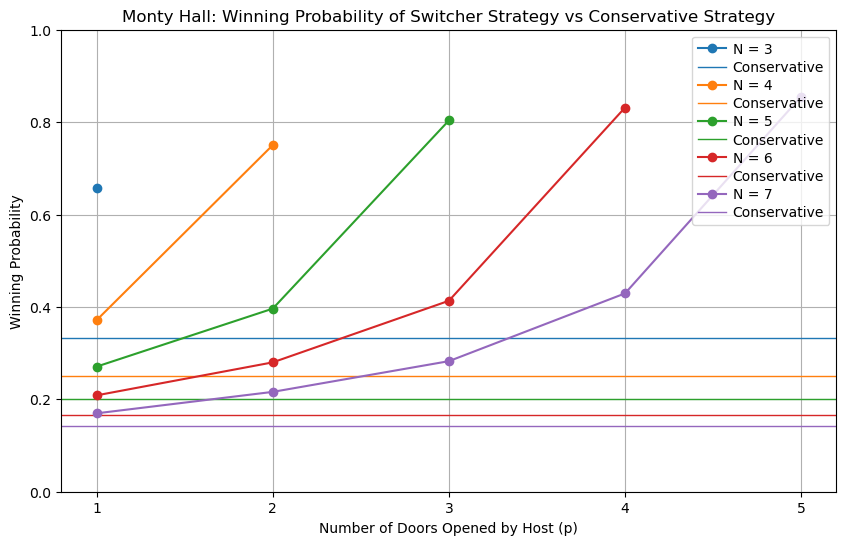

In [10]:
# Parameters
p_values = [1, 2, 3, 4, 5]
N_values = [3, 4, 5, 6, 7]

# Prepare containers for results
results = { 'Conservative': {}, 'Switcher': {}, 'Newcomer': {} }

for N in N_values:
    results['Conservative'][N] = []
    results['Switcher'][N] = []
    results['Newcomer'][N] = []
    for p in p_values:
        if p < N - 1:
            win_rates = MontyHall(p, N)
            results['Conservative'][N].append(win_rates[0])
            results['Switcher'][N].append(win_rates[1])
            results['Newcomer'][N].append(win_rates[2])
        else:
            results['Conservative'][N].append(np.nan)
            results['Switcher'][N].append(np.nan)
            results['Newcomer'][N].append(np.nan)

plot_strategy('Switcher', results['Switcher'], p_values, N_values)

It appears that is always better to switch.

For a given number of opened doors, the winning probability reduces with the number of $N_{doors}$, i.e $p_{switch} \propto 1/N_{doors}$

Also, for the situation where $N_{doors}-p=2$, the winning probability increases with the number of doors $N_{doors}$, i.e. $p_{switch} = 1 - 1/N_{doors}$.

All this is consistent with the formula $$p_{switch} = \frac{1}{N} \frac{N-1}{N-p-1}$$